In [43]:
from ngboost import NGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
from datetime import datetime as dt
import numpy as np
from epftoolbox.data import read_data
from epftoolbox.evaluation import MAE, sMAPE
import matplotlib.pyplot as plt

In [20]:
train_data = pd.read_csv('df_trainFR.csv', parse_dates=['Date'])
test_data = pd.read_csv('FR_test.csv', parse_dates=['Date'])
#test_data1 = pd.read_csv('df_test_f.csv', parse_dates=['Date'])
train_data

,Date,Price,Exogenous 1,Exogenous 2
0,2011-01-09 00:00:00,32.542,63065.0,63000.0
1,2011-01-09 01:00:00,21.549,62715.0,58800.0
2,2011-01-09 02:00:00,15.711,61952.0,58500.0
3,2011-01-09 03:00:00,10.583,59262.0,54300.0
4,2011-01-09 04:00:00,10.324,56883.0,51900.0
...,...,...,...,...
43675,2016-01-02 19:00:00,37.360,65413.0,64725.0
43676,2016-01-02 20:00:00,32.840,63183.0,61618.0
43677,2016-01-02 21:00:00,26.150,60221.0,58354.0
43678,2016-01-02 22:00:00,30.620,60328.0,55770.0


In [21]:
len(test_data) 

744

In [22]:
# Defining empty forecast array and the real values to be predicted in a more friendly format
forecast = pd.DataFrame(index=test_data.index[::24].sort_values(), columns=['h' + str(k) for k in range(24)])
real_values = test_data.loc[:, ['Price']].values.reshape(-1, 24)
real_values = pd.DataFrame(real_values, index=forecast.index, columns=forecast.columns)

In [23]:
test_data.index[::24].sort_values()

RangeIndex(start=0, stop=744, step=24)

In [24]:
train_data['day'] = train_data['Date'].apply(lambda x: x.day)
train_data['month'] = train_data['Date'].apply(lambda x: x.month)
train_data['year'] = train_data['Date'].apply(lambda x: x.year)
train_data['hour'] = train_data['Date'].apply(lambda x: x.hour)
#train_data['minute'] = train_data['Date'].apply(lambda x: x.day)

train_data['day_of_year'] = train_data['Date'].apply(lambda x: x.day_of_year)
train_data['week_day'] = train_data['Date'].apply(lambda x: x.weekday())
train_data['week_of_year'] = train_data['Date'].apply(lambda x: x.week)

test_data['day'] = test_data['Date'].apply(lambda x: x.day)
test_data['month'] = test_data['Date'].apply(lambda x: x.month)
test_data['year'] = test_data['Date'].apply(lambda x: x.year)
test_data['hour'] = test_data['Date'].apply(lambda x: x.hour)
#test_data['minute'] = test_data['Date'].apply(lambda x: x.day)

test_data['day_of_year'] = test_data['Date'].apply(lambda x: x.day_of_year)
test_data['week_day'] = test_data['Date'].apply(lambda x: x.weekday())
test_data['week_of_year'] = test_data['Date'].apply(lambda x: x.week)

#converting the date into ng boost acceptable format

In [25]:
train_data.set_index('Date', inplace=True)
test_data.set_index('Date', inplace=True)

In [26]:
cols=['h0_m','h0_sd','h1_m','h1_sd','h2_m','h2_sd','h3_m','h3_sd','h4_m','h4_sd','h5_m','h5_sd','h6_m','h6_sd',
        'h7_m','h7_sd','h8_m','h8_sd','h9_m','h9_sd','h10_m','h10_sd','h11_m','h11_sd','h12_m','h12_sd','h13_m','h13_sd',
        'h14_m','h14_sd','h15_m','h15_sd','h16_m','h16_sd','h17_m','h17_sd','h18_m','h18_sd','h19_m','h19_sd',
         'h20_m','h20_sd','h21_m','h21_sd','h22_m','h22_sd','h23_m','h23_sd']

forecast_ng_FR = pd.DataFrame(index=test_data.index[::24].sort_values(), columns=cols)

#forecast_ng_NP = pd.DataFrame(index=test_data.index[::24], columns=['m_h' + str(k) for k in range()])



# frame for h0, h1, h2... h24
real_values_ng_FR= test_data.loc[:, ['Price']].values.reshape(-1, 24)
# to the location
real_values_ng_FR = pd.DataFrame(real_values, index=forecast.index, columns=forecast.columns)
#inserting the forecasted values into the dataframe


In [27]:
forecast_ng_FR

,h0_m,h0_sd,h1_m,h1_sd,h2_m,h2_sd,h3_m,h3_sd,h4_m,h4_sd,...,h19_m,h19_sd,h20_m,h20_sd,h21_m,h21_sd,h22_m,h22_sd,h23_m,h23_sd
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
real_values_ng_FR.head()

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23
0,72.00,65.80,59.99,50.69,52.58,65.05,80.40,200.00,197.61,152.22,...,87.75,89.61,86.80,110.37,266.90,124.41,103.72,72.90,73.10,73.00
24,69.28,66.60,62.48,55.73,55.23,61.19,69.65,82.46,92.97,84.07,...,66.70,67.83,78.68,88.12,85.00,82.97,71.40,65.00,63.98,62.18
48,68.41,59.36,51.00,49.09,48.72,49.09,50.00,53.00,58.41,62.20,...,50.05,50.33,52.00,64.60,67.08,68.33,61.23,54.81,53.00,50.10
72,48.73,44.41,42.37,36.35,34.58,35.38,36.52,40.67,42.37,44.25,...,34.20,35.68,44.00,50.10,53.01,53.01,52.30,44.00,48.81,45.14
96,45.76,43.50,42.00,37.60,36.70,44.25,53.00,66.57,77.78,80.00,...,63.67,66.00,67.63,81.97,84.50,81.08,70.15,65.76,63.69,62.42


In [29]:
real_values_ng_FR.index = forecast_ng_FR.index

In [30]:
forecast_dates_ng_FR = forecast_ng_FR.index

In [31]:
forecast_dates_ng_FR

DatetimeIndex(['2016-01-12', '2016-02-12', '2016-03-12', '2016-04-12',
               '2016-05-12', '2016-06-12', '2016-07-12', '2016-08-12',
               '2016-09-12', '2016-10-12', '2016-11-12', '2016-12-12',
               '2016-12-13', '2016-12-14', '2016-12-15', '2016-12-16',
               '2016-12-17', '2016-12-18', '2016-12-19', '2016-12-20',
               '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-24',
               '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [32]:
X_train = train_data.drop('Price', axis=1)
y_train = train_data['Price']

X_test = test_data.drop('Price', axis=1)
y_test = test_data['Price']


In [33]:
forecast_ng_FR

,h0_m,h0_sd,h1_m,h1_sd,h2_m,h2_sd,h3_m,h3_sd,h4_m,h4_sd,...,h19_m,h19_sd,h20_m,h20_sd,h21_m,h21_sd,h22_m,h22_sd,h23_m,h23_sd
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
real_values_ng_FR

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-12,72.00,65.80,59.99,50.69,52.58,65.05,80.40,200.00,197.61,152.22,...,87.75,89.61,86.80,110.37,266.90,124.41,103.72,72.90,73.10,73.00
2016-02-12,69.28,66.60,62.48,55.73,55.23,61.19,69.65,82.46,92.97,84.07,...,66.70,67.83,78.68,88.12,85.00,82.97,71.40,65.00,63.98,62.18
2016-03-12,68.41,59.36,51.00,49.09,48.72,49.09,50.00,53.00,58.41,62.20,...,50.05,50.33,52.00,64.60,67.08,68.33,61.23,54.81,53.00,50.10
2016-04-12,48.73,44.41,42.37,36.35,34.58,35.38,36.52,40.67,42.37,44.25,...,34.20,35.68,44.00,50.10,53.01,53.01,52.30,44.00,48.81,45.14
2016-05-12,45.76,43.50,42.00,37.60,36.70,44.25,53.00,66.57,77.78,80.00,...,63.67,66.00,67.63,81.97,84.50,81.08,70.15,65.76,63.69,62.42
2016-06-12,60.56,50.00,50.50,48.00,45.87,50.83,61.91,77.65,80.09,76.00,...,66.10,66.90,72.97,89.25,82.71,75.84,70.21,66.00,65.26,62.10
2016-07-12,50.96,50.00,49.36,47.18,46.71,49.38,59.58,69.94,70.00,69.08,...,64.10,63.10,65.08,69.46,71.01,70.00,68.22,58.64,58.98,56.79
2016-08-12,50.00,49.10,46.35,44.30,41.20,44.98,49.96,57.71,59.20,57.71,...,51.03,50.14,51.63,60.00,68.02,66.55,63.03,58.12,55.95,51.54
2016-09-12,49.25,47.08,44.99,44.06,41.84,44.99,50.00,60.37,62.51,62.48,...,55.07,55.98,56.35,66.00,68.33,66.00,59.60,53.00,53.71,52.95


In [35]:
#loop over each date:


for date in forecast_dates_ng_FR:
    
    print(date)

    # For simulation purposes, we assume that the available data is
    # the data up to current date where the prices of current date are not known
    data_available = pd.concat([train_data, test_data.loc[:date + pd.Timedelta(hours=23), :]], axis=0)

    # We set the real prices for current date to NaN in the dataframe of available data
    data_available.loc[date:date + pd.Timedelta(hours=23), 'Price'] = np.NaN

    # Recalibrating the model with the most up-to-date available data and making a prediction
    # for the next day
    #Yp = model.recalibrate_and_forecast_next_day(df=data_available, next_day_date=date, 
    #                                             calibration_window=365)
    
    X_train = data_available.loc[train_data.index.values].drop('Price', axis=1)
    y_train = data_available.loc[train_data.index.values]['Price']
    
    X_test = data_available.loc[date:date + pd.Timedelta(hours=23)].drop('Price', axis=1)
    y_test = data_available.loc[date:date + pd.Timedelta(hours=23), 'Price']
    
    #print(y_test)

    print("training ngboost")
    ngb = NGBRegressor()#learning_rate=0.09, n_estimators=800)
    ngb.fit(X_train, y_train)
    print("ngboost trained")
    
    ## train the NgBoost model
    ## make a prediction for the 24 hours over the "date"
    ## model.fit(X_train, y_train)
    
    #get out t he predicted price at each hour in the "date"
    
    y0_dist = ngb.pred_dist(pd.DataFrame(X_test.iloc[0]).T)
    y1_dist = ngb.pred_dist(pd.DataFrame(X_test.iloc[1]).T)
    y2_dist = ngb.pred_dist(pd.DataFrame(X_test.iloc[2]).T)
    y3_dist = ngb.pred_dist(pd.DataFrame(X_test.iloc[3]).T)
    y4_dist = ngb.pred_dist(pd.DataFrame(X_test.iloc[4]).T)
    y5_dist = ngb.pred_dist(pd.DataFrame(X_test.iloc[5]).T)
    y6_dist = ngb.pred_dist(pd.DataFrame(X_test.iloc[6]).T)
    y7_dist = ngb.pred_dist(pd.DataFrame(X_test.iloc[7]).T)
    y8_dist = ngb.pred_dist(pd.DataFrame(X_test.iloc[8]).T)
    y9_dist = ngb.pred_dist(pd.DataFrame(X_test.iloc[9]).T)
    y10_dist = ngb.pred_dist(pd.DataFrame(X_test.iloc[10]).T)
    y11_dist = ngb.pred_dist(pd.DataFrame(X_test.iloc[11]).T)
    y12_dist = ngb.pred_dist(pd.DataFrame(X_test.iloc[12]).T)
    y13_dist = ngb.pred_dist(pd.DataFrame(X_test.iloc[13]).T)
    y14_dist = ngb.pred_dist(pd.DataFrame(X_test.iloc[14]).T)
    y15_dist = ngb.pred_dist(pd.DataFrame(X_test.iloc[15]).T)
    y16_dist = ngb.pred_dist(pd.DataFrame(X_test.iloc[16]).T)
    y17_dist = ngb.pred_dist(pd.DataFrame(X_test.iloc[17]).T)
    y18_dist = ngb.pred_dist(pd.DataFrame(X_test.iloc[18]).T)
    y19_dist = ngb.pred_dist(pd.DataFrame(X_test.iloc[19]).T)
    y20_dist = ngb.pred_dist(pd.DataFrame(X_test.iloc[20]).T)
    y21_dist = ngb.pred_dist(pd.DataFrame(X_test.iloc[21]).T)
    y22_dist = ngb.pred_dist(pd.DataFrame(X_test.iloc[22]).T)
    y23_dist = ngb.pred_dist(pd.DataFrame(X_test.iloc[23]).T)
    
    print("y0_dist")
    y0_mean = y0_dist.loc[0]
    y0_sd = y0_dist.scale[0]
    print(y0_mean,y0_sd)
    
    y1_mean = y1_dist.loc[0]
    y1_sd = y1_dist.scale[0]
    print(y1_mean,y1_sd)
    
    y2_mean = y2_dist.loc[0]
    y2_sd = y2_dist.scale[0]
    print(y2_mean,y2_sd)
    
    y3_mean = y3_dist.loc[0]
    y3_sd = y3_dist.scale[0]
    print(y3_mean,y3_sd)
    
    y4_mean = y4_dist.loc[0]
    y4_sd = y4_dist.scale[0]
    print(y4_mean,y4_sd)
   
    y5_mean = y5_dist.loc[0]
    y5_sd = y5_dist.scale[0]
    print(y5_mean,y5_sd)
    
    y6_mean = y6_dist.loc[0]
    y6_sd = y6_dist.scale[0]
    print(y6_mean,y6_sd)
    
    y7_mean = y7_dist.loc[0]
    y7_sd = y7_dist.scale[0]
    print(y7_mean,y7_sd)
    
    y8_mean = y8_dist.loc[0]
    y8_sd = y8_dist.scale[0]
    print(y8_mean,y8_sd)
    
    y9_mean = y9_dist.loc[0]
    y9_sd = y9_dist.scale[0]
    print(y9_mean,y9_sd)
    
    y10_mean = y10_dist.loc[0]
    y10_sd = y10_dist.scale[0]
    print(y10_mean,y10_sd)
    
    y11_mean = y11_dist.loc[0]
    y11_sd = y11_dist.scale[0]
    print(y11_mean,y11_sd)
    
    y12_mean = y12_dist.loc[0]
    y12_sd = y12_dist.scale[0]
    print(y12_mean,y12_sd)
    
    y13_mean = y13_dist.loc[0]
    y13_sd = y13_dist.scale[0]
    print(y13_mean,y13_sd)
    
    
    y14_mean = y14_dist.loc[0]
    y14_sd = y14_dist.scale[0]
    print(y14_mean,y14_sd)
    
    y15_mean = y15_dist.loc[0]
    y15_sd = y15_dist.scale[0]
    print(y15_mean,y15_sd)
    
    y16_mean = y16_dist.loc[0]
    y16_sd = y16_dist.scale[0]
    print(y16_mean,y16_sd)
    
    y17_mean = y17_dist.loc[0]
    y17_sd = y17_dist.scale[0]
    print(y17_mean,y17_sd)
    
    y18_mean = y18_dist.loc[0]
    y18_sd = y18_dist.scale[0]
    print(y18_mean,y18_sd)
    
    y19_mean = y19_dist.loc[0]
    y19_sd = y19_dist.scale[0]
    print(y19_mean,y19_sd)
    
    y20_mean = y20_dist.loc[0]
    y20_sd = y20_dist.scale[0]
    print(y20_mean,y20_sd)
    
    y21_mean = y21_dist.loc[0]
    y21_sd = y21_dist.scale[0]
    print(y21_mean,y21_sd)
    
    y22_mean = y22_dist.loc[0]
    y22_sd = y22_dist.scale[0]
    print(y22_mean,y22_sd)
    
    y23_mean = y23_dist.loc[0]
    y23_sd = y23_dist.scale[0]
    print(y23_mean,y23_sd)
    
    
    #put the values y0,...y23 into an array Yp
    
    Yp = [y0_mean, y0_sd, y1_mean, y1_sd, y2_mean, y2_sd, y3_mean, y3_sd, y4_mean, y4_sd, y5_mean, y5_sd, y6_mean, y6_sd, 
          y7_mean, y7_sd, y8_mean, y8_sd, y9_mean, y9_sd, y10_mean, y10_sd, y11_mean, y11_sd, y12_mean, y12_sd, 
          y13_mean, y13_sd, y14_mean, y14_sd, y15_mean, y15_sd, y16_mean, y16_sd, y17_mean, y17_sd, y18_mean, y18_sd, 
          y19_mean, y19_sd, y20_mean, y20_sd, y21_mean, y21_sd, y22_mean, y22_sd, y23_mean, y23_sd]
         
    # Saving the current prediction
    forecast_ng_FR.loc[date, :] = Yp
    
    print(Yp)

    #foreacsting 24 hours price for 30 days using NG booster
    

2016-01-12 00:00:00
training ngboost


C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 0] loss=4.5401 val_loss=0.0000 scale=0.5000 norm=6.8665
[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
44.463551799951354 7.293349376158102
39.96350365782833 7.293349376158102
38.171423544902645 7.293349376158102
34.85236702383962 7.3130116437441535
32.61953361584981 7.3130116437441535
36.68149461508436 7.3130116437441535
44.82350212131046 7.302434959888149
51.87565939853356 8.063683327845274
56.35652156970926 8.63616030757065
55.31659477056154 8.672449323730621
54.29648509344393 8.361052765453014
53.57700108802969 8.20691708848355
53.48820687127331 8.171187612266833
51.534652308439064 8.069430028042495
50.778308232961415 8.069430028042495
48.47744509897493 8.022342813136293
48.16033693651399 8.022342813136293
49.845385344156085 8.477366077563211
52.

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
50.59550091589859 7.156201503225652
42.815153768111216 7.121998561558075
42.30946745959164 7.121998561558075
38.89665631731482 7.1411988814992275
35.659620571093065 7.1411988814992275
40.25045116199964 7.1411988814992275
47.506831291460166 7.13087068750721
55.3593373274232 8.027146563294671
61.563524048766 9.466344537308256
59.870409326806644 9.466344537308256
61.563524048766 9.445122985167231
58.1308156442748 8.4110880556133
58.042021427518414 8.172059126741997
57.7898085541803 8.196257346480078
54.3194949129691 8.032867225039796
52.988311144008456 8.024345584895856
50.441998260911824 7.985993363562095
53.83828632837862 8.479482445533401
58.364197444589465 9.187530064801122
58.364197444589465 9.50031580760662

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
50.64800657821635 7.2828780532418405
44.148486479102054 7.2828780532418405
43.33512722364954 7.2828780532418405
36.87713849607562 7.3025120910061005
34.79436337654449 7.3025120910061005
36.0621198381262 7.3025120910061005
41.22429126865753 7.291950592473919
46.58340404799403 8.160573963938441
47.9640138865294 8.160573963938441
50.08425696497266 8.160573963938441
51.4876465128526 8.142279674607023
50.4013651274336 8.142279674607023
51.4876465128526 8.142279674607023
52.07910284726769 8.205608277893433
46.70249965908692 8.16638971464458
45.22294931297892 8.16638971464458
44.61758074398888 8.16638971464458
48.1133206249513 8.629583247144254
52.491518870183405 9.196697001762969
55.40540016641204 9.240863549729369


C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
50.20880557427991 7.939411476983206
45.66431029928113 7.549763263525271
43.653783875696554 7.549763263525271
37.68840085551272 7.570116801775344
35.60421304711012 7.614422589361746
37.090202453676575 7.614422589361746
44.57664793925911 7.603409980002292
47.298588153606474 8.521981781127401
49.62589924873546 8.521981781127401
49.62589924873546 8.521981781127401
51.44585082883311 8.50287729153268
51.660646270070266 8.50287729153268
52.49035198923104 8.50287729153268
53.34413251134982 8.968193588181421
49.28489215864096 8.528055094325753
46.39520025558865 8.528055094325753
46.17741079084924 8.528055094325753
48.17032428445749 8.910208801351029
52.68051884328108 9.418811056768199
55.24894212870094 9.90492204767811

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
48.25219981547236 7.426722503930701
43.38767947500548 7.426722503930701
42.43376053105824 7.426722503930701
37.59290427863723 7.4467443344544115
35.604213047110115 7.490328057312585
38.506028601080445 7.4467443344544115
49.0976566461997 7.4359742352915905
57.68548291208221 8.527705419779634
61.20577260254596 8.70116064879194
61.20577260254596 8.660811721151411
61.20577260254596 8.64139600404967
58.82690391100106 8.508588098991666
58.73810969424468 8.508588098991666
58.48589682090656 8.533782812011601
57.00339572562056 8.524729777254121
54.35744507583085 8.4839859783027
53.499059924013615 8.4839859783027
57.37390651817252 8.906734472314543
59.06028571131573 9.425137034974576
61.590655986234616 9.898134480919664

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
48.42678852088439 8.05053372770759
42.74460581384971 8.05053372770759
42.32611286513729 8.05053372770759
36.46132555749622 8.072237301772228
34.00201636086019 8.072237301772228
35.18859941776808 8.072237301772228
44.46812530372039 8.078965478215613
51.75780938775561 9.214426809704767
55.94516285698443 9.396333100858907
55.94516285698443 9.358251931648583
53.426919851292375 9.193770004089766
53.426919851292375 9.193770004089766
53.426919851292375 9.193770004089766
52.979693181654916 9.220993603837389
49.366358018317776 9.167186717110106
46.90706104507846 9.167186717110106
45.64614023695777 9.167186717110106
50.864962407126185 9.577980778380583
57.28142697820451 9.432486844145773
59.82021389141004 9.618697959998

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
50.00248100708818 7.377843372286226
43.51713349418622 7.377843372286226
42.56321455023899 7.377843372286226
37.722358297817976 7.397733428707782
35.778591361438906 7.4410303043697645
38.6354826202612 7.397733428707782
48.26837239507647 7.387034213180978
56.20264368970911 8.422146280692802
58.92770588690488 8.471580145727973
58.92770588690488 8.471580145727973
58.92770588690488 8.452588645992158
58.4335066342701 8.452588645992158
58.16375231168318 8.452588645992158
57.44527779789153 8.477617539474096
54.458247051734666 8.428148444682199
52.263380756961524 8.428148444682199
51.31830666179196 8.428148444682199
54.174250790326596 8.805825199331405
58.66688843458477 9.363105295717327
61.53995637876445 9.50925109390

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
48.3816538346531 7.046482240072669
43.51713349418623 7.046482240072669
42.563214550238996 7.046482240072669
36.806355029016444 7.065478974247724
35.43545317676061 7.1068312570230425
38.63548262026119 7.1068312570230425
48.268372395076476 7.055260292664495
55.11636230429011 8.007435318618866
58.927705886904874 8.054435033848927
58.433506634270096 8.054435033848927
58.25254652843956 8.036378685660493
57.44520479161887 8.027853320395378
57.356410574862494 8.027853320395378
57.10419770152438 8.051624533459208
53.29273535682187 8.013141932861249
51.23429775791937 8.013141932861249
51.23429775791937 8.013141932861249
52.83776964737071 8.684703450989192
58.019666688300696 9.234318310096079
59.16108768721955 9.2343183

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
46.828693756843286 6.901029713236576
43.625660562869164 6.901029713236576
42.67174161892193 6.901029713236576
37.08464492331714 6.9601330139971616
36.239552775676586 7.001449031599828
39.036571246595166 6.9601330139971616
49.59460751188659 6.902184239962301
56.08887660419545 7.853259210043862
59.92915038102401 7.89935398718701
59.92915038102401 7.89935398718701
59.33244358711998 7.881645298066429
58.56782629016505 7.873284081194458
58.479032073408675 7.784211641738124
58.22681920007056 7.807261409351541
53.55300321932782 7.769946738090925
52.523920220285646 7.769946738090925
51.34594986362187 7.769946738090925
53.098309110694814 8.738098645800912
58.65883965819491 9.281236216383817
59.142288186846876 9.2910926

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
46.77473671857488 6.879495378332685
39.71572530427034 6.879495378332685
39.28928070116339 6.879495378332685
35.91210284911644 6.938414250055085
35.361127904099035 6.938414250055085
37.082585454071726 6.938414250055085
45.01893744950038 6.928379340012576
48.143869842552355 7.853259210043862
51.08158838472632 7.853259210043862
51.44586837538235 7.853259210043862
51.85327743712517 7.835653855712408
51.08158838472632 7.835653855712408
51.35707415862596 7.747007136444293
52.523920220285625 7.769946738090922
48.413270199502826 7.769946738090922
47.21066412250794 7.769946738090922
46.738408108324684 7.769946738090922
48.37725164286702 8.738098645800912
51.679250175697014 9.236876707953412
53.09830911069479 9.23687670

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
42.02270869967992 6.911338379084687
37.84504191760862 6.911338379084687
36.70604413719007 6.911338379084687
33.81026302138668 6.970529967565133
33.436301185494116 6.970529967565133
34.00121069480441 6.970529967565133
39.40552251550123 6.960448609108824
41.16181544341351 7.81767588279173
41.99242587881678 7.81767588279173
42.34335248735203 7.81767588279173
42.99549841432812 7.800150298791016
43.73079817795435 7.800150298791016
46.90140070586257 7.711905240175785
47.31782394590425 7.734740901874604
41.89612581771456 7.734740901874604
40.875952662630596 7.734740901874604
40.71458877377604 7.734740901874604
43.31373521782465 8.69850608743008
49.341327394538574 9.195024172859922
52.21791339160599 9.195024172859922


C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
43.31797300157907 7.155940240591213
39.04480964263229 7.155940240591213
37.8607487505945 7.155940240591213
35.33668376435386 7.260068851982359
34.785708819336456 7.260068851982359
37.4335428790711 7.260068851982359
47.30782450550117 7.157137413273952
55.781189042905375 8.042547974845641
59.70331615012303 8.089753784134283
59.70331615012303 8.089753784134283
59.70331615012303 8.071618258740985
59.70331615012303 8.071618258740985
59.614521933366646 7.980302014940811
59.36230906002853 8.003932424209616
58.00098496916958 7.995441479451694
55.440181952810875 7.957227404791421
54.80102904288805 7.957227404791421
58.57537385957875 8.991690512069471
62.05127587124053 14.48466014372886
63.03190420117216 16.848932260816

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
51.41256456157794 7.133610469514073
44.466553339692474 7.133610469514073
43.815196271298795 7.133610469514073
37.8864259055588 7.152842094200087
37.04468888549954 7.1708242511913145
38.873816476744295 7.152842094200087
50.112702558687765 7.142497060828372
58.341992059264086 8.081171796075699
61.817894070925874 12.314962543577954
61.817894070925874 12.314962543577954
59.703316150123044 12.098513062224274
59.703316150123044 8.071618258740985
59.61452193336666 7.980302014940815
59.362309060028544 8.00393242420962
57.776763206495666 7.9954414794516975
55.440181952810875 7.957227404791425
54.58179680099364 7.957227404791425
56.33167900568098 8.948714882339285
59.93669795043771 9.515037808274586
62.05127587124054 14

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
48.24545680820068 7.133610469514077
43.41754912217765 7.133610469514077
42.46363017823042 7.133610469514077
36.87653348262563 7.152842094200093
36.03144133498507 7.1947056890115215
38.70566107387038 7.1947056890115215
49.11876454772258 7.1424970608283775
56.953260520228156 8.042547974845652
59.5351607472491 12.125696321371061
59.5351607472491 8.089753784134293
59.5351607472491 8.071618258740996
59.5351607472491 8.071618258740996
58.84965973658869 7.9803020149408255
58.597446863250575 8.00393242420963
55.27202654993693 7.9572274047914355
53.181372633275934 7.9572274047914355
52.471920508955336 7.9572274047914355
55.20726253042327 8.948714882339297
59.35279585949028 9.515037808274604
61.883120468366606 14.484660

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
44.866129738956325 7.133610469514076
39.273023791755065 7.133610469514076
38.31910484780783 7.133610469514076
32.41357986801017 7.152842094200091
31.809759741784283 7.19470568901152
34.24270745925491 7.152842094200091
44.48583907110796 7.142497060828376
55.36826819630807 8.081171796075706
59.17917692692579 12.314962543577964
57.06459900612295 8.08975378413429
57.06459900612295 8.071618258740992
57.06459900612295 8.071618258740992
56.97580478936657 7.980302014940818
56.723591916028454 8.003932424209623
54.03090673272551 7.957227404791428
51.83229470071154 7.957227404791428
51.70601933132469 7.957227404791428
53.265068742937956 8.948714882339294
57.29798080643762 9.515037808274595
59.412558727240466 14.484660143

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
44.838332954047466 7.133610469514077
39.27302379175506 7.133610469514077
38.31910484780783 7.133610469514077
31.940736018460107 7.1708242511913225
30.24721197504435 7.194705689011525
33.166043483478944 7.194705689011525
44.485839071107975 7.14249706082838
53.0316869426233 8.006106975144046
57.06459900612297 12.070754467444802
57.06459900612297 8.053098893649867
57.06459900612297 8.035045540806552
56.64885231804948 8.035045540806552
56.379097995462566 7.944143053346223
56.12688512212445 7.96766639259943
52.69067985252881 7.921172994871775
49.18163625481858 7.921172994871775
48.132574408656474 7.921172994871775
52.28040822173388 8.90816801617487
56.277736811945836 9.47192491780549
57.29798080643764 9.47192491780

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
41.54386818209414 7.166996340017111
37.34141091763734 7.166996340017111
36.52805166218482 7.166996340017111
29.60212110218252 7.228377490053542
27.896031554919176 7.228377490053542
29.1233760771483 7.228377490053542
34.972259653742 7.217923211128722
37.99941818784238 7.942930073622453
42.506514474979824 7.942930073622453
44.11935614917316 7.942930073622453
45.426913775570476 7.925123696087221
44.64042300267433 7.925123696087221
45.426913775570476 7.835464782052888
47.32321900873044 7.858666314935295
41.19563789566322 7.858666314935295
37.552191518204914 7.858666314935295
36.53048307101819 7.858666314935295
40.23046487623523 8.636404070639035
47.08034969135034 9.129377320419112
50.51749891013948 9.1497419111819

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
38.075190798208794 8.093240906388923
29.972124220031073 8.093240906388923
29.22799274635263 8.093240906388923
23.571407799614246 8.162554801748728
22.57493004282387 8.391583600156943
21.764682530100842 8.397878179833874
25.86863094691599 8.398577950420758
29.049960475668936 8.981460292880763
30.96896144662744 8.981460292880763
33.107746281734094 8.981460292880763
36.99458116622652 8.961325749165743
38.74870959075475 8.961325749165743
39.83688859318543 8.859944021158796
40.899641969503335 8.886179131424884
32.97835447605068 8.886179131424884
30.521734776989977 8.886179131424884
30.521734776989977 8.886179131424884
35.642229621617524 9.494666161564727
45.29711293001924 9.295875587452008
50.15130942556531 9.36055

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
39.55624990060788 7.620296019024966
35.121907897812996 7.5587676090785605
34.16798895386576 7.5587676090785605
27.446029579989286 7.579145422300608
25.842315406398214 7.6687579036449
29.198780958455206 7.579145422300608
41.044669571216836 7.560032173872636
53.5206843406585 8.497888637717622
55.475035268331126 12.963736484965603
57.58961318913396 13.227421470570208
57.58961318913396 13.583796962598177
57.58961318913396 13.583796962598177
57.50081897237759 13.430120057248331
57.24860609903947 13.469887879680089
57.24860609903947 13.026409055262578
55.13402817823663 8.41666631042049
54.553727329914985 8.55710616866193
55.7084170686458 13.799843480548718
58.80362331938027 15.944183547416488
60.09049075575709 17.23

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
50.47750313673607 7.487981569171293
41.585378068096475 7.45219289040046
39.0343814170092 7.45219289040046
34.051713633442105 7.472283386982583
29.93126039594843 7.472283386982583
35.880841224686854 7.472283386982583
43.94369896745021 7.461476351124221
53.60295362794447 8.336439347581248
57.58961318913396 12.976116952730372
58.5702415190656 14.997568983242774
59.85710895544241 14.963947590009928
59.85710895544241 14.963947590009928
59.76831473868603 14.794656694115218
59.51610186534791 14.838465035205433
57.24860609903946 12.838457880137977
54.99207570284868 12.582526776041725
54.99207570284868 8.394531819261756
57.82299498944863 13.748968839311944
60.09049075575708 16.90605999268971
60.09049075575708 16.906059

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
50.36764876703846 7.487981569171286
40.10245686401257 7.452192890400457
38.700305284637686 7.452192890400457
33.71763750107059 7.47228338698258
28.719014082476487 7.47228338698258
35.54676509231534 7.47228338698258
42.11956639673877 7.461476351124214
52.91948469199724 8.336439347581251
57.46444214823217 12.915944244155753
57.46444214823217 12.976116952730372
57.46444214823217 12.94702722950985
57.46444214823217 12.94702722950985
57.37564793147579 13.174964518957887
57.12343505813767 12.838457880137971
54.53282852957537 8.256760143246115
53.070630011015595 8.248000987053885
52.80269936457666 8.385626508450988
53.82895330763498 9.03175891133916
57.69782394854684 14.533771610743539
57.69782394854684 15.0285679833

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
46.25082969574518 7.452192890400464
37.51255200674623 7.452192890400464
36.19971003941059 7.452192890400464
28.719014082476477 7.472283386982586
26.09087382700121 7.472283386982586
28.449650302686294 7.472283386982586
39.61768731446432 7.461476351124221
47.06433065557251 8.296595479491161
53.59557150732031 8.484541341891012
54.29353477134821 8.484541341891012
54.29353477134821 8.465520785881246
54.29353477134821 8.465520785881246
54.0237804487613 8.369748223899416
54.53282852957536 8.256760143246115
49.687819094212685 8.208579808582712
47.64846578722622 8.208579808582712
44.38877845456557 8.345547551173816
47.297712455887186 8.979056258071054
53.1528664923119 9.537171129488707
54.34595646583235 9.5472993498522

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
38.600739561814564 7.479272342670178
29.493412665391602 7.479272342670178
28.21385519647834 7.479272342670178
24.613703019595476 7.543327954819087
22.356407201387807 7.588222590863368
24.06906007866774 7.543327954819087
33.222338873845544 7.4885895372270825
40.10398638438351 8.289014588678535
47.15639459541791 8.42732445993409
48.25735345888939 8.42732445993409
48.57446162135033 8.408432172131656
48.25735345888939 8.408432172131656
48.168559242133014 8.17686688482868
47.9163463687949 8.201079340781257
42.62814247934472 8.201079340781257
40.00406787262302 8.201079340781257
39.398699303632974 8.201079340781257
39.97308819404214 8.82362149712057
43.71785059361446 9.482915586735762
46.76849011467855 9.482915586735

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
28.453631642721835 7.479272342670165
23.181731436068034 7.523046442910927
23.351467920837617 7.523046442910927
19.445021905482488 7.880690178065376
19.711884760009955 7.880690178065376
20.25282396997671 7.880690178065376
24.08160336040492 7.869292470439432
27.33805887923473 8.659726349708508
29.23741059652839 8.289014588678532
30.21027702587774 8.289014588678532
30.561203634413 8.270432362498395
30.561203634413 8.270432362498395
31.531777845581946 8.176866884828673
35.46329731702902 8.201079340781254
30.113976964775542 8.201079340781254
29.153597566772945 8.201079340781254
28.277515973355086 8.249888629516935
31.16340559683297 8.762653706794858
33.97170453425795 9.327281275969124
33.97170453425795 9.2628333925

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
25.204634817851105 8.108340110597704
20.392568845531553 8.155795969473512
19.147982887117347 8.155795969473512
17.724381198172786 8.543520457925752
15.070421403095345 8.543520457925752
14.323958345024312 8.566394676807505
19.086902582567475 8.57353473138154
21.51577299188714 9.400646196927891
22.342499316387006 9.400646196927891
22.398715966054674 9.400646196927891
23.701721706928065 9.379571926638954
23.887718432646867 9.379571926638954
23.415552381979943 9.273458474622478
23.194758405009303 9.293946591434462
21.924286197712576 9.300918039270824
21.2098989002889 9.300918039270824
21.2098989002889 9.300918039270824
25.535434831887294 9.36420548559193
30.450871131813322 9.168146376939328
30.1852547662683 9.7224

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
21.910994740301444 9.140284805798327
21.690806021862446 9.34661422916899
19.833323182251327 9.34661422916899
15.79984084862125 9.371811929226848
14.270803061035009 9.396903796033216
16.323073031440728 9.396903796033216
26.532011623892117 9.3481778966753
31.5682137444692 10.251986941524555
31.301350889941745 10.033191452255442
32.20383722846762 9.931908797759489
33.20070260723538 9.400145472629386
34.4478251846672 9.400145472629386
35.28786669914867 9.29379926692198
35.689605874308576 9.321319062529755
33.22310915702289 9.321319062529755
32.347027563605025 9.82654466154274
32.347027563605025 9.82654466154274
33.434084407550046 9.712412435355285
35.80403786460953 10.01853742073759
38.604192809288605 10.088243255

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
26.15636771084481 8.369198038763708
22.917699815858562 8.874455143153288
21.246685866976335 8.874455143153288
20.098045498236345 9.185150288492919
16.737252612858114 9.185150288492919
20.921541426792665 9.185150288492919
27.15642319639495 8.976122160604106
33.90767067663909 8.96409325593279
36.20901039483123 8.866531969422427
38.37081100897394 8.866531969422427
40.16154611852297 8.846655070820482
41.249725120953656 8.846655070820482
41.5114599679293 8.746570640986574
41.302947433589246 8.77247004223205
38.02980391887944 8.868996335279354
34.158862216494505 8.868996335279354
34.158862216494505 8.868996335279354
35.662086838141526 9.438386342950684
41.83363598500035 10.143615180502579
46.17276379770673 10.143615

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
33.65148800833794 8.05175474637533
26.2084118327666 8.113654472787678
24.63450418201702 8.161480579050787
21.44560838175433 8.491111797445717
20.032640099987578 8.989122975656496
21.856234106620757 8.898379941309196
29.56487291060936 8.219474004721805
36.08265708632487 8.9640932559328
40.16154611852297 8.86653196942244
41.24972512095365 9.014478252066098
42.693016369845836 8.846655070820493
41.90652559694969 8.846655070820493
43.588097594934574 8.746570640986581
43.66618658268843 8.772470042232056
38.02980391887944 8.772470042232056
35.229648974200366 8.86899633527936
34.1588622164945 8.772470042232056
36.31603888663954 9.438386342950698
43.0782809568882 10.143615180502588
47.12183987445052 10.143615180502588


C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
27.08216845345826 8.051754746375337
29.531527125879073 8.161480579050794
28.00966359705128 8.369198038763715
24.392449813508826 8.412857488625628
22.2812780358196 8.44087534626193
24.59772735006037 8.44087534626193
32.347769273230575 8.17164762457922
39.14250006137281 8.866531969422436
45.787499210664386 8.866531969422436
46.88845807413587 8.866531969422436
47.20556623659681 8.84665507082049
46.88845807413587 8.84665507082049
46.79966385737949 8.746570640986574
48.23899421043942 8.77247004223205
40.90871803085916 8.77247004223205
38.02980391887946 8.77247004223205
38.02980391887946 8.77247004223205
39.37588186168748 9.59587454447186
47.27372266117824 10.143615180502591
51.67457930484968 10.203153223073901
49.9

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
42.9959969097772 7.964122954815998
34.77704734543347 7.964122954815998
33.734029102934265 8.051754746375323
27.76180199736592 8.07346161220545
24.386642582331667 8.07346161220545
26.19563429247426 8.07346161220545
36.496061214945485 7.9740441449592945
41.54240283158672 8.82635747623164
50.038373391187896 9.016728709680647
50.26259515386182 9.016728709680647
51.23146336470833 9.00606915973682
50.714460206510964 9.00606915973682
51.142669147951956 8.904181238292919
51.87332540910421 8.783978536731237
46.48959963094241 8.732721746145886
43.27803336849751 8.732721746145886
41.507667153756245 8.732721746145886
45.34174337682606 9.552395380591763
50.915790387343115 10.14614752628941
52.599597086241076 10.15692246327

C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:57: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
C:\Anaconda\lib\site-packages\ngboost\distns\normal.py:58: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 100] loss=4.1488 val_loss=0.0000 scale=0.5000 norm=5.4635
[iter 200] loss=4.0042 val_loss=0.0000 scale=0.5000 norm=4.6906
[iter 300] loss=3.7888 val_loss=0.0000 scale=1.0000 norm=7.8424
[iter 400] loss=3.6165 val_loss=0.0000 scale=2.0000 norm=13.9914
ngboost trained
y0_dist
43.240915294493796 7.9641229548160055
36.64430982733353 7.9641229548160055
37.18572221910653 8.051754746375334
31.04560701325041 8.073461612205461
26.176718981187292 8.073461612205461
25.945514807884226 8.073461612205461
33.90043143096841 7.974044144959305
36.447801508952885 8.82635747623165
39.338194783664164 8.9736334103168
42.4326776244827 8.9736334103168
45.22517971435223 8.953516412825218
46.741403158105186 8.996515101597849
46.741403158105186 8.894735267612292
47.487266461988156 8.783978536731244
43.08640981831672 8.73272174614589
38.104477341130554 8.73272174614589
37.44767686513451 8.73272174614589
41.92050322057017 9.552395380591776
49.33321263350889 10.146147526289422
50.00929944883196 10.15692246327

In [48]:
forecast_ng_FR

,h0_m,h0_sd,h1_m,h1_sd,h2_m,h2_sd,h3_m,h3_sd,h4_m,h4_sd,...,h19_m,h19_sd,h20_m,h20_sd,h21_m,h21_sd,h22_m,h22_sd,h23_m,h23_sd
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-12,44.463552,7.293349,39.963504,7.293349,38.171424,7.293349,34.852367,7.313012,32.619534,7.313012,...,56.589903,9.773564,53.026138,7.931739,49.995591,7.709327,48.097019,7.67248,49.031383,7.717514
2016-02-12,50.595501,7.156202,42.815154,7.121999,42.309467,7.121999,38.896656,7.141199,35.659621,7.141199,...,58.364197,9.500316,54.808475,7.774451,52.889556,7.674395,50.37868,7.637716,51.769296,7.682545
2016-03-12,50.648007,7.282878,44.148486,7.282878,43.335127,7.282878,36.877138,7.302512,34.794363,7.302512,...,55.4054,9.240864,52.493529,7.903678,49.784868,7.810245,48.755785,7.868829,50.903846,7.810245
2016-04-12,50.208806,7.939411,45.66431,7.549763,43.653784,7.549763,37.688401,7.570117,35.604213,7.614423,...,55.248942,9.904922,54.616736,8.51233,51.30762,8.058873,50.081175,8.058873,52.013561,8.411701
2016-05-12,48.2522,7.426723,43.387679,7.426723,42.433761,7.426723,37.592904,7.446744,35.604213,7.490328,...,61.590656,9.898134,58.276041,8.1,56.630907,7.995755,52.22612,7.95754,55.208727,7.995755
2016-06-12,48.426789,8.050534,42.744606,8.050534,42.326113,8.050534,36.461326,8.072237,34.002016,8.072237,...,59.820214,9.618698,56.497183,8.106317,52.336231,7.963745,49.349724,8.02348,51.047914,7.963745
2016-07-12,50.002481,7.377843,43.517133,7.377843,42.563215,7.377843,37.722358,7.397733,35.778591,7.44103,...,61.539956,9.509251,57.934313,8.04669,54.394929,7.905167,51.222279,7.964463,52.972748,7.905167
2016-08-12,48.381654,7.046482,43.517133,7.046482,42.563215,7.046482,36.806355,7.065479,35.435453,7.106831,...,59.161088,9.234318,57.320396,7.927591,52.355574,7.796433,50.210629,7.854914,51.858536,7.796433
2016-09-12,46.828694,6.90103,43.625661,6.90103,42.671742,6.90103,37.084645,6.960133,36.239553,7.001449,...,59.142288,9.291093,56.007161,7.938209,52.511901,7.903207,50.728562,7.903207,52.091007,7.903207


In [47]:
real_values

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-12,72.00,65.80,59.99,50.69,52.58,65.05,80.40,200.00,197.61,152.22,...,87.75,89.61,86.80,110.37,266.90,124.41,103.72,72.90,73.10,73.00
2016-02-12,69.28,66.60,62.48,55.73,55.23,61.19,69.65,82.46,92.97,84.07,...,66.70,67.83,78.68,88.12,85.00,82.97,71.40,65.00,63.98,62.18
2016-03-12,68.41,59.36,51.00,49.09,48.72,49.09,50.00,53.00,58.41,62.20,...,50.05,50.33,52.00,64.60,67.08,68.33,61.23,54.81,53.00,50.10
2016-04-12,48.73,44.41,42.37,36.35,34.58,35.38,36.52,40.67,42.37,44.25,...,34.20,35.68,44.00,50.10,53.01,53.01,52.30,44.00,48.81,45.14
2016-05-12,45.76,43.50,42.00,37.60,36.70,44.25,53.00,66.57,77.78,80.00,...,63.67,66.00,67.63,81.97,84.50,81.08,70.15,65.76,63.69,62.42
2016-06-12,60.56,50.00,50.50,48.00,45.87,50.83,61.91,77.65,80.09,76.00,...,66.10,66.90,72.97,89.25,82.71,75.84,70.21,66.00,65.26,62.10
2016-07-12,50.96,50.00,49.36,47.18,46.71,49.38,59.58,69.94,70.00,69.08,...,64.10,63.10,65.08,69.46,71.01,70.00,68.22,58.64,58.98,56.79
2016-08-12,50.00,49.10,46.35,44.30,41.20,44.98,49.96,57.71,59.20,57.71,...,51.03,50.14,51.63,60.00,68.02,66.55,63.03,58.12,55.95,51.54
2016-09-12,49.25,47.08,44.99,44.06,41.84,44.99,50.00,60.37,62.51,62.48,...,55.07,55.98,56.35,66.00,68.33,66.00,59.60,53.00,53.71,52.95


In [39]:
forecast_ng_FR.to_csv('ngboost_FR.csv')


In [64]:
ng_FR = pd.read_csv('FR_DATA.csv', index_col=[0])


In [62]:
ng_FR

,Predicted,Real Price
Date,,
01/12/2016 00:00,44.463552,72.00
01/12/2016 01:00,39.963504,65.80
01/12/2016 02:00,38.171424,59.99
01/12/2016 03:00,34.852367,50.69
01/12/2016 04:00,32.619534,52.58
...,...,...
31/12/2016 19:00,50.009299,69.72
31/12/2016 20:00,48.912822,57.10
31/12/2016 21:00,44.061156,54.49


In [65]:
MAE_NGB_FR = pd.DataFrame(columns=['MAE','sMAPE(%)'], index=ng_FR.index)
for date in ng_FR.index:
    ng_FR.loc[date]['MAE'] = MAE(pd.Series(ng_FR.loc[date]['Predicted']), pd.Series(ng_FR.loc[date]['Real Price']))
    ng_FR.loc[date]['sMAPE(%)'] = sMAPE(pd.Series(ng_FR.loc[date]['Predicted']), pd.Series(ng_FR.loc[date]['Real Price'])) * 100

In [67]:
#NGBOOST FR MAE
print(f"Overall MAE : {MAE(ng_FR['Predicted'], ng_FR['Real Price'])}")

Overall MAE : 14.890192014395161


In [68]:
#NGBOOST FR MAPE
print(f"Overall sMAPE : {sMAPE(ng_FR['Predicted'], ng_FR['Real Price']) * 100} %")

Overall sMAPE : 28.618586036865622 %


In [ ]:
import pickle
filename = 'FR_NGboost_model.pkl'
pickle.dump(NGBRegressor, open(filename, 'wb'))
#pkl_file = open('data.pkl', 'rb')

In [69]:
combined_df = pd.concat([real_values_ng_FR, forecast_ng_FR], axis=1)

combined_df.head()

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h19_m,h19_sd,h20_m,h20_sd,h21_m,h21_sd,h22_m,h22_sd,h23_m,h23_sd
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-12,72.00,65.80,59.99,50.69,52.58,65.05,80.40,200.00,197.61,152.22,...,56.589903,9.773564,53.026138,7.931739,49.995591,7.709327,48.097019,7.67248,49.031383,7.717514
2016-02-12,69.28,66.60,62.48,55.73,55.23,61.19,69.65,82.46,92.97,84.07,...,58.364197,9.500316,54.808475,7.774451,52.889556,7.674395,50.37868,7.637716,51.769296,7.682545
2016-03-12,68.41,59.36,51.00,49.09,48.72,49.09,50.00,53.00,58.41,62.20,...,55.4054,9.240864,52.493529,7.903678,49.784868,7.810245,48.755785,7.868829,50.903846,7.810245
2016-04-12,48.73,44.41,42.37,36.35,34.58,35.38,36.52,40.67,42.37,44.25,...,55.248942,9.904922,54.616736,8.51233,51.30762,8.058873,50.081175,8.058873,52.013561,8.411701
2016-05-12,45.76,43.50,42.00,37.60,36.70,44.25,53.00,66.57,77.78,80.00,...,61.590656,9.898134,58.276041,8.1,56.630907,7.995755,52.22612,7.95754,55.208727,7.995755


In [70]:
combined_df["abs_err_0"] = abs(combined_df["h0_m"]-combined_df["h0"])
combined_df["abs_err_1"] = abs(combined_df["h1_m"]-combined_df["h1"])
combined_df["abs_err_2"] = abs(combined_df["h2_m"]-combined_df["h2"])
combined_df["abs_err_3"] = abs(combined_df["h3_m"]-combined_df["h3"])
combined_df["abs_err_4"] = abs(combined_df["h4_m"]-combined_df["h4"])
combined_df["abs_err_5"] = abs(combined_df["h5_m"]-combined_df["h5"])
combined_df["abs_err_6"] = abs(combined_df["h6_m"]-combined_df["h6"])
combined_df["abs_err_7"] = abs(combined_df["h7_m"]-combined_df["h7"])
combined_df["abs_err_8"] = abs(combined_df["h8_m"]-combined_df["h8"])
combined_df["abs_err_9"] = abs(combined_df["h9_m"]-combined_df["h9"])
combined_df["abs_err_10"] = abs(combined_df["h10_m"]-combined_df["h10"])
combined_df["abs_err_11"] = abs(combined_df["h11_m"]-combined_df["h11"])
combined_df["abs_err_12"] = abs(combined_df["h12_m"]-combined_df["h12"])
combined_df["abs_err_13"] = abs(combined_df["h13_m"]-combined_df["h13"])
combined_df["abs_err_14"] = abs(combined_df["h14_m"]-combined_df["h14"])
combined_df["abs_err_15"] = abs(combined_df["h15_m"]-combined_df["h15"])
combined_df["abs_err_16"] = abs(combined_df["h16_m"]-combined_df["h16"])
combined_df["abs_err_17"] = abs(combined_df["h17_m"]-combined_df["h17"])
combined_df["abs_err_18"] = abs(combined_df["h18_m"]-combined_df["h18"])
combined_df["abs_err_19"] = abs(combined_df["h19_m"]-combined_df["h19"])
combined_df["abs_err_20"] = abs(combined_df["h20_m"]-combined_df["h20"])
combined_df["abs_err_21"] = abs(combined_df["h21_m"]-combined_df["h21"])
combined_df["abs_err_22"] = abs(combined_df["h22_m"]-combined_df["h22"])
combined_df["abs_err_23"] = abs(combined_df["h23_m"]-combined_df["h23"])

In [71]:
combined_df

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,abs_err_14,abs_err_15,abs_err_16,abs_err_17,abs_err_18,abs_err_19,abs_err_20,abs_err_21,abs_err_22,abs_err_23
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-12,72.00,65.80,59.99,50.69,52.58,65.05,80.40,200.00,197.61,152.22,...,36.971692,41.132555,38.639663,60.524615,214.790959,67.820097,50.693862,22.904409,25.002981,23.968617
2016-02-12,69.28,66.60,62.48,55.73,55.23,61.19,69.65,82.46,92.97,84.07,...,12.380505,14.841689,28.238002,34.281714,26.635803,24.605803,16.591525,12.110444,13.60132,10.410704
2016-03-12,68.41,59.36,51.00,49.09,48.72,49.09,50.00,53.00,58.41,62.20,...,3.3475,5.107051,7.382419,16.486679,14.588481,12.9246,8.736471,5.025132,4.244215,0.803846
2016-04-12,48.73,44.41,42.37,36.35,34.58,35.38,36.52,40.67,42.37,44.25,...,15.084892,10.7152,2.177411,1.929676,0.329481,2.238942,2.316736,7.30762,1.271175,6.873561
2016-05-12,45.76,43.50,42.00,37.60,36.70,44.25,53.00,66.57,77.78,80.00,...,6.666604,11.642555,14.13094,24.596093,25.439714,19.489344,11.873959,9.129093,11.46388,7.211273
2016-06-12,60.56,50.00,50.50,48.00,45.87,50.83,61.91,77.65,80.09,76.00,...,16.733642,19.992939,27.32386,38.385038,25.428573,16.019786,13.712817,13.663769,15.910276,11.052086
2016-07-12,50.96,50.00,49.36,47.18,46.71,49.38,59.58,69.94,70.00,69.08,...,9.641753,10.836619,13.761693,15.285749,12.343112,8.460044,10.285687,4.245071,7.757721,3.817252
2016-08-12,50.00,49.10,46.35,44.30,41.20,44.98,49.96,57.71,59.20,57.71,...,2.262735,1.094298,0.395702,7.16223,10.000333,7.388912,5.709604,5.764426,5.739371,0.318536
2016-09-12,49.25,47.08,44.99,44.06,41.84,44.99,50.00,60.37,62.51,62.48,...,1.516997,3.45608,5.00405,12.901691,9.67116,6.857712,3.592839,0.488099,2.981438,0.858993


In [72]:
combined_df.to_csv('FRcombined.csv')

In [73]:
from scipy import stats
def calc_reliability_scores(df):
    #standard normal distribution: (conf,z_star)
    #conf = confidence limit, e.g. 95% (0.95)
    #z_star = n, where area within n sd of mean = conf
    #e.g. (0.95,1.96) tells us that the area within -/+1.96 standard deviations of mean is 0.95
            
        conf_levels = []
        rel_vals = []
        for i in range(1,20):
            conf = 0.05*i #0.05,0.10,0.15,..,0.90,0.95
            z_star = stats.norm.ppf(1-(1-conf)/2.0)
            conf_levels.append(conf)
            rel_vals.append((conf,z_star))
                
        #print(rel_vals)
            
        #create a new dataframe that stores the absolute errors in each prediction
            
        row_coverages = []
        for index, row in df.iterrows():
            #print(row["h0"],row["h0_m"],row["h0_sd"])
            #print(row["h1"],row["h1_m"],row["h1_sd"])
            #print(row["h2"],row["h2_m"],row["h2_sd"])
            
            row_coverage = []
            
            #print(index)
            for rel_val in rel_vals:
                count = 0
                conf_level = rel_val[0]
                n_sd = rel_val[1]
                #print(conf_level,n_sd)
                
                if row["abs_err_0"] < n_sd*row["h0_sd"]:
                    count = count+1
                if row["abs_err_1"] < n_sd*row["h1_sd"]:
                    count = count+1
                if row["abs_err_2"] < n_sd*row["h2_sd"]:
                    count = count+1                
                if row["abs_err_3"] < n_sd*row["h3_sd"]:
                    count = count+1                
                if row["abs_err_4"] < n_sd*row["h4_sd"]:
                    count = count+1   
                if row["abs_err_5"] < n_sd*row["h5_sd"]:
                    count = count+1                    
                if row["abs_err_6"] < n_sd*row["h6_sd"]:
                    count = count+1                    
                if row["abs_err_7"] < n_sd*row["h7_sd"]:
                    count = count+1                    
                if row["abs_err_8"] < n_sd*row["h8_sd"]:
                    count = count+1                    
                if row["abs_err_9"] < n_sd*row["h9_sd"]:
                    count = count+1                                       
                if row["abs_err_10"] < n_sd*row["h10_sd"]:
                    count = count+1      
                if row["abs_err_11"] < n_sd*row["h11_sd"]:
                    count = count+1                
                if row["abs_err_12"] < n_sd*row["h12_sd"]:
                    count = count+1            
                if row["abs_err_13"] < n_sd*row["h13_sd"]:
                    count = count+1            
                if row["abs_err_14"] < n_sd*row["h14_sd"]:
                    count = count+1        
                if row["abs_err_15"] < n_sd*row["h15_sd"]:
                    count = count+1
                if row["abs_err_16"] < n_sd*row["h16_sd"]:
                    count = count+1      
                if row["abs_err_17"] < n_sd*row["h17_sd"]:
                    count = count+1                
                if row["abs_err_18"] < n_sd*row["h18_sd"]:
                    count = count+1            
                if row["abs_err_19"] < n_sd*row["h19_sd"]:
                    count = count+1            
                if row["abs_err_20"] < n_sd*row["h20_sd"]:
                    count = count+1        
                if row["abs_err_21"] < n_sd*row["h21_sd"]:
                    count = count+1                    
                if row["abs_err_22"] < n_sd*row["h22_sd"]:
                    count = count+1        
                if row["abs_err_23"] < n_sd*row["h23_sd"]:
                    count = count+1    
                    
                row_coverage.append([conf_level,float(count/24.0)])
                    
                #print(conf_level,float(count/24.0))
                
            row_coverages.append(row_coverage)
                                     
        return row_coverages
                    

In [74]:
date_coverages = calc_reliability_scores(combined_df)

print(date_coverages[1])

[[0.05, 0.0], [0.1, 0.0], [0.15000000000000002, 0.0], [0.2, 0.0], [0.25, 0.0], [0.30000000000000004, 0.0], [0.35000000000000003, 0.0], [0.4, 0.0], [0.45, 0.0], [0.5, 0.0], [0.55, 0.0], [0.6000000000000001, 0.0], [0.65, 0.0], [0.7000000000000001, 0.0], [0.75, 0.041666666666666664], [0.8, 0.08333333333333333], [0.8500000000000001, 0.125], [0.9, 0.25], [0.9500000000000001, 0.375]]


In [75]:
RMSE = []

for data in date_coverages:
    SSE = 0
    for sample in data:
        SSE += ((sample[1] - sample[0]) ** 2)
    MSE = SSE/19
    RMSE.append(np.sqrt(MSE))

In [86]:
RMSE

[0.570087712549569,
 0.5042763038684992,
 0.2273753755434145,
 0.1492549723916283,
 0.15437101203504872,
 0.46567093016923267,
 0.2548864556290858,
 0.15851789796930874,
 0.1806623615723233,
 0.0689308493223759,
 0.2114244366142685,
 0.30116125151686546,
 0.24053728844921932,
 0.42120337213958103,
 0.5312252746224156,
 0.48181476506667714,
 0.4578745710421333,
 0.468292905790847,
 0.4640394404995995,
 0.38545370850921745,
 0.3910082184565752,
 0.5379596497836261,
 0.47426458921660525,
 0.5665021691064733,
 0.28971779977897794,
 0.3425267309327972,
 0.5371097114233396,
 0.47424532230797406,
 0.36851111054687513,
 0.4268492619153286,
 0.3988745130902481]

In [99]:
RMSE_FR =  pd.DataFrame(RMSE, columns=['RMSE'])

In [95]:
RMSE_FR

,RMSE
0,0.570088
1,0.504276
2,0.227375
3,0.149255
4,0.154371
5,0.465671
6,0.254886
7,0.158518
8,0.180662
9,0.068931


In [100]:
RMSE_FR .to_csv('FRRMSE.csv')

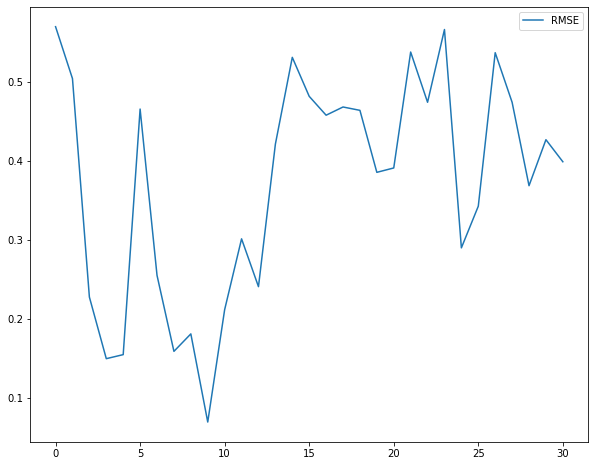

In [80]:
 pd.DataFrame(RMSE, columns=['RMSE']).plot(figsize = (10, 8));

In [111]:
combined_df

,h0,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,abs_err_14,abs_err_15,abs_err_16,abs_err_17,abs_err_18,abs_err_19,abs_err_20,abs_err_21,abs_err_22,abs_err_23
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-12,72.00,65.80,59.99,50.69,52.58,65.05,80.40,200.00,197.61,152.22,...,36.971692,41.132555,38.639663,60.524615,214.790959,67.820097,50.693862,22.904409,25.002981,23.968617
2016-02-12,69.28,66.60,62.48,55.73,55.23,61.19,69.65,82.46,92.97,84.07,...,12.380505,14.841689,28.238002,34.281714,26.635803,24.605803,16.591525,12.110444,13.60132,10.410704
2016-03-12,68.41,59.36,51.00,49.09,48.72,49.09,50.00,53.00,58.41,62.20,...,3.3475,5.107051,7.382419,16.486679,14.588481,12.9246,8.736471,5.025132,4.244215,0.803846
2016-04-12,48.73,44.41,42.37,36.35,34.58,35.38,36.52,40.67,42.37,44.25,...,15.084892,10.7152,2.177411,1.929676,0.329481,2.238942,2.316736,7.30762,1.271175,6.873561
2016-05-12,45.76,43.50,42.00,37.60,36.70,44.25,53.00,66.57,77.78,80.00,...,6.666604,11.642555,14.13094,24.596093,25.439714,19.489344,11.873959,9.129093,11.46388,7.211273
2016-06-12,60.56,50.00,50.50,48.00,45.87,50.83,61.91,77.65,80.09,76.00,...,16.733642,19.992939,27.32386,38.385038,25.428573,16.019786,13.712817,13.663769,15.910276,11.052086
2016-07-12,50.96,50.00,49.36,47.18,46.71,49.38,59.58,69.94,70.00,69.08,...,9.641753,10.836619,13.761693,15.285749,12.343112,8.460044,10.285687,4.245071,7.757721,3.817252
2016-08-12,50.00,49.10,46.35,44.30,41.20,44.98,49.96,57.71,59.20,57.71,...,2.262735,1.094298,0.395702,7.16223,10.000333,7.388912,5.709604,5.764426,5.739371,0.318536
2016-09-12,49.25,47.08,44.99,44.06,41.84,44.99,50.00,60.37,62.51,62.48,...,1.516997,3.45608,5.00405,12.901691,9.67116,6.857712,3.592839,0.488099,2.981438,0.858993


In [109]:
print(f'Average RMSE of PJM Dataset : {np.average(RMSE_FR)}')

Average RMSE of PJM Dataset : 0.3711170955438752


Index(['h0_sd', 'h1_sd', 'h2_sd', 'h3_sd', 'h4_sd', 'h5_sd', 'h6_sd', 'h7_sd',
       'h8_sd', 'h9_sd', 'h10_m', 'h10_sd', 'h11_sd', 'h12_sd', 'h13_sd',
       'h14_sd', 'h15_sd', 'h16_sd', 'h17_sd', 'h18_sd', 'h19_sd', 'h20_sd',
       'h21_sd', 'h22_sd', 'h23_sd'],
      dtype='object')

In [119]:
std_dv = combined_df.drop(['h0', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8', 'h9', 'h10',
       'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20',
       'h21', 'h22', 'h23', 'h0_m', 'h1_m', 'h2_m',
       'h3_m', 'h4_m', 'h5_m', 'h6_m',
       'h7_m', 'h8_m', 'h9_m','h10_m',
       'h11_m', 'h12_m', 'h13_m', 'h14_m',
        'h15_m', 'h16_m', 'h17_m',
       'h18_m', 'h19_m', 'h20_m', 'h21_m',
         'h22_m', 'h23_m', 'abs_err_0',
       'abs_err_1', 'abs_err_2', 'abs_err_3', 'abs_err_4', 'abs_err_5',
       'abs_err_6', 'abs_err_7', 'abs_err_8', 'abs_err_9', 'abs_err_10',
       'abs_err_11', 'abs_err_12', 'abs_err_13', 'abs_err_14', 'abs_err_15',
       'abs_err_16', 'abs_err_17', 'abs_err_18', 'abs_err_19', 'abs_err_20',
       'abs_err_21', 'abs_err_22', 'abs_err_23'], axis=1)

sharpness_score = []
for i in range(0, len(std_dv)):
    sharpness_score.append(std_dv.iloc[i].sum()/24)
    
sharpness_score = pd.DataFrame(sharpness_score, columns=['Sharpness Score'], index=std_dv.index)

sharpness_score.reset_index(inplace=True)

sharpness_score['Day'] = sharpness_score['Date'].dt.day_name()

sharpness_score['RMSE'] = RMSE_FR

avg_shaprness = sharpness_score.groupby('Day').mean()

avg_shaprness

,Sharpness Score,RMSE
Day,,
Friday,8.166684,0.409145
Monday,9.124862,0.322097
Saturday,8.079418,0.372410
Sunday,8.744356,0.407894
Thursday,8.376660,0.398017
Tuesday,8.870085,0.356222
Wednesday,8.692618,0.338847


<AxesSubplot:xlabel='Day'>

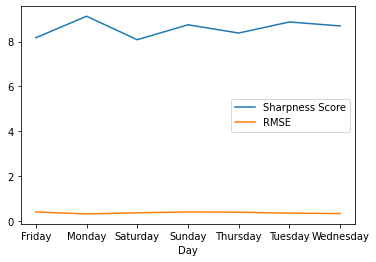

In [120]:
avg_shaprness.plot()

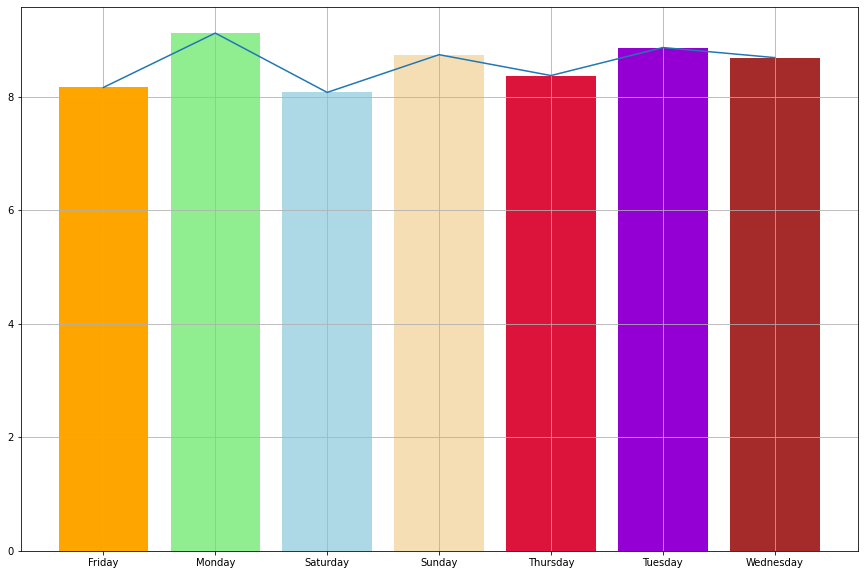

In [121]:
fig, ax = plt.subplots(figsize = (15, 10))
ax.bar(avg_shaprness.index, height=avg_shaprness['Sharpness Score'], color=['Orange', 'LightGreen', 'LightBlue', 'Wheat', 'Crimson', 'DarkViolet', 'Brown'])
ax.plot(avg_shaprness.index, avg_shaprness['Sharpness Score'])
ax.grid()

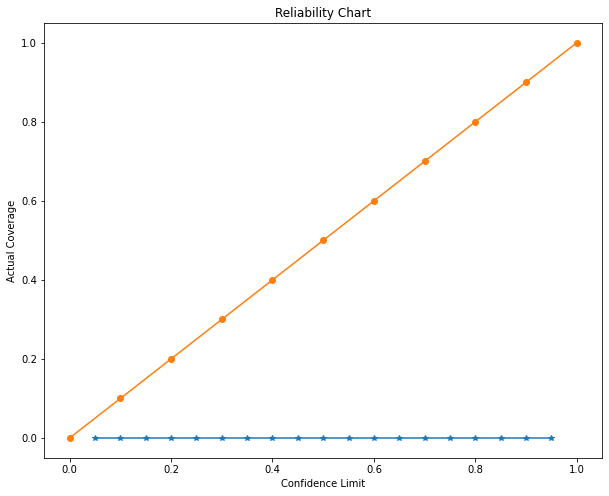

In [84]:
x = []
y = []
for sample in date_coverages[0]:
    x.append(sample[0])
    y.append(sample[1])
    
fig, ax = plt.subplots(figsize = (10, 8))
ax.plot(x, y, '-*')
ax.plot(np.arange(0.0,1.1, 0.1), np.arange(0.0,1.1, 0.1), '-o')
ax.set(xlabel='Confidence Limit', ylabel='Actual Coverage', title='Reliability Chart');

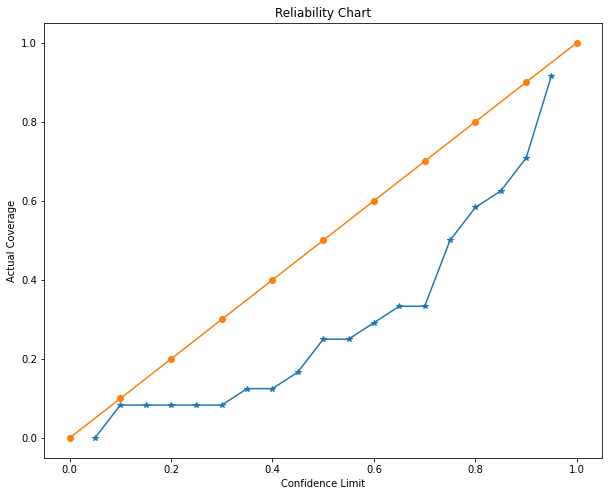

In [108]:
x = []
y = []
for sample in date_coverages[2]:
    x.append(sample[0])
    y.append(sample[1])
    
fig, ax = plt.subplots(figsize = (10, 8))
ax.plot(x, y, '*-')
ax.plot(np.arange(0.0,1.1, 0.1), np.arange(0.0,1.1, 0.1), '-o' )
ax.set(xlabel='Confidence Limit', ylabel='Actual Coverage', title='Reliability Chart');